In [1]:

%load_ext autoreload
%matplotlib inline
%autoreload 2
%config Completer.use_jedi = True
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rc("figure", dpi=100)
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore')
import scalp
from scalp.output import draw
import lmz
import numpy as np

In [2]:
datasets = scalp.data.loaddata_scib(scalp.test_config.scib_datapath,  maxdatasets=10,  maxcells = 1000 )
dataset = datasets[1]

# scanorama

[[0.    0.616 0.874 0.071 0.048 0.019 0.025 0.164 0.091 0.027]
 [0.    0.    0.687 0.121 0.062 0.062 0.022 0.032 0.012 0.02 ]
 [0.    0.    0.    0.343 0.157 0.092 0.074 0.287 0.128 0.   ]
 [0.    0.    0.    0.    0.254 0.569 0.352 0.522 0.425 0.008]
 [0.    0.    0.    0.    0.    0.371 0.13  0.065 0.049 0.05 ]
 [0.    0.    0.    0.    0.    0.    0.888 0.404 0.326 0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.724 0.524 0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.923 0.023]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.077]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]]
Processing datasets Sun_sample3_TB <=> Sun_sample4_TC
Processing datasets Sun_sample1_CS <=> Sun_sample2_KC
Processing datasets Oetjen_A <=> Oetjen_U
Processing datasets Sun_sample2_KC <=> Sun_sample3_TB
Processing datasets Oetjen_P <=> Oetjen_U
Processing datasets Oetjen_A <=> Oetjen_P
Processing datasets Freytag <=> Sun_sample1_CS
Processing datasets Sun_sample2_KC

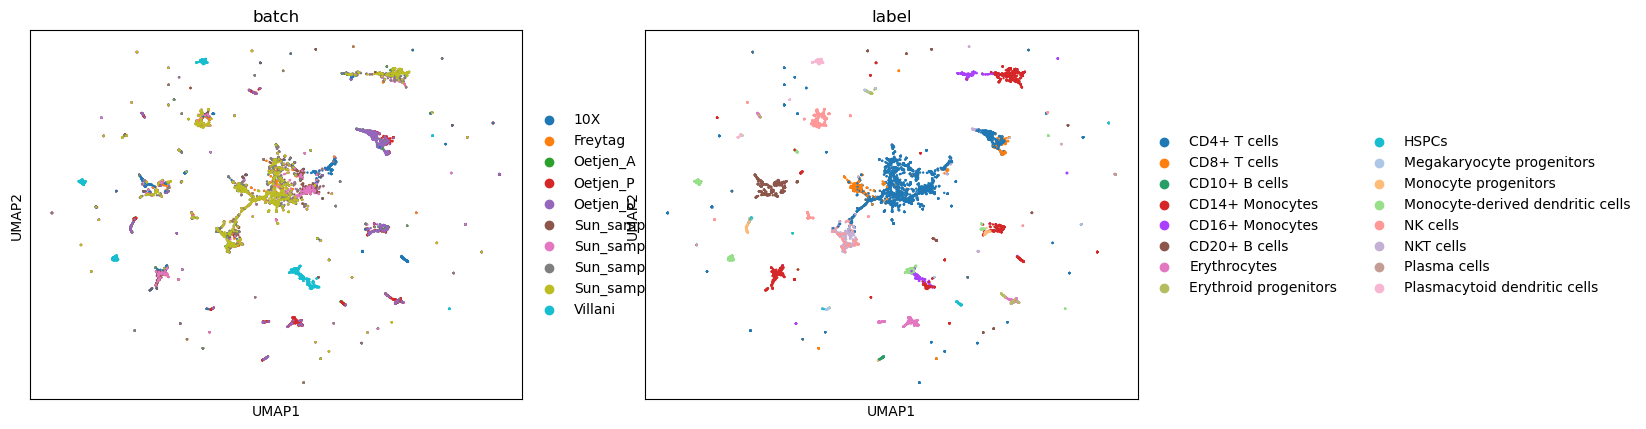

In [3]:
import scanpy as sc

def scanorama(dataset, dim = 2):
    dataset = scalp.pca.pca(dataset)
    dataset = scalp.mnn.scanorama(dataset)
    [ds.obsm.pop('umap', None)for ds in dataset]
    scalp.umapwrap.adatas_umap(dataset, label ='umap', from_obsm ='scanorama', dim= dim)
    return scalp.transform.stack(dataset)

st = scanorama(dataset)
sc.pl.umap(st, color=['batch', 'label'])

# UMAP ONLY 

redundant pca :) 


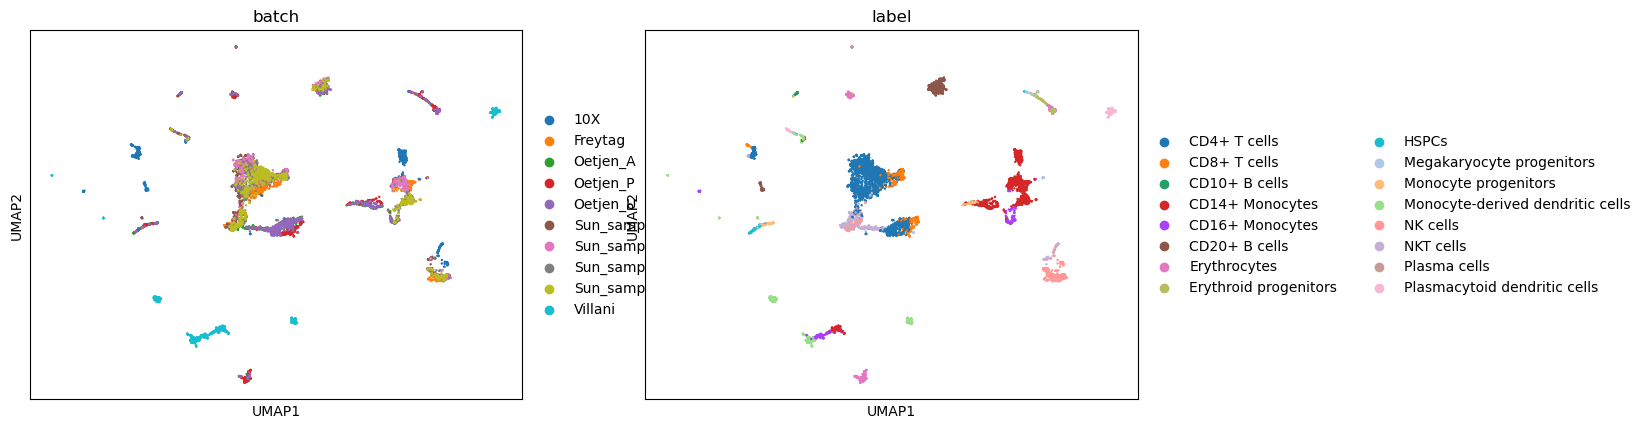

In [4]:
import scanpy as sc
def umaponly(dataset,dim=2):
    dataset = scalp.pca.pca(dataset)
    [ds.obsm.pop('umap', None)for ds in dataset]
    scalp.umapwrap.adatas_umap(dataset, label ='umap', from_obsm ='pca40', dim =dim)
    return scalp.transform.stack(dataset)
    
stack = umaponly(dataset)
sc.pl.umap(stack, color=['batch', 'label'])

redundant pca :) 


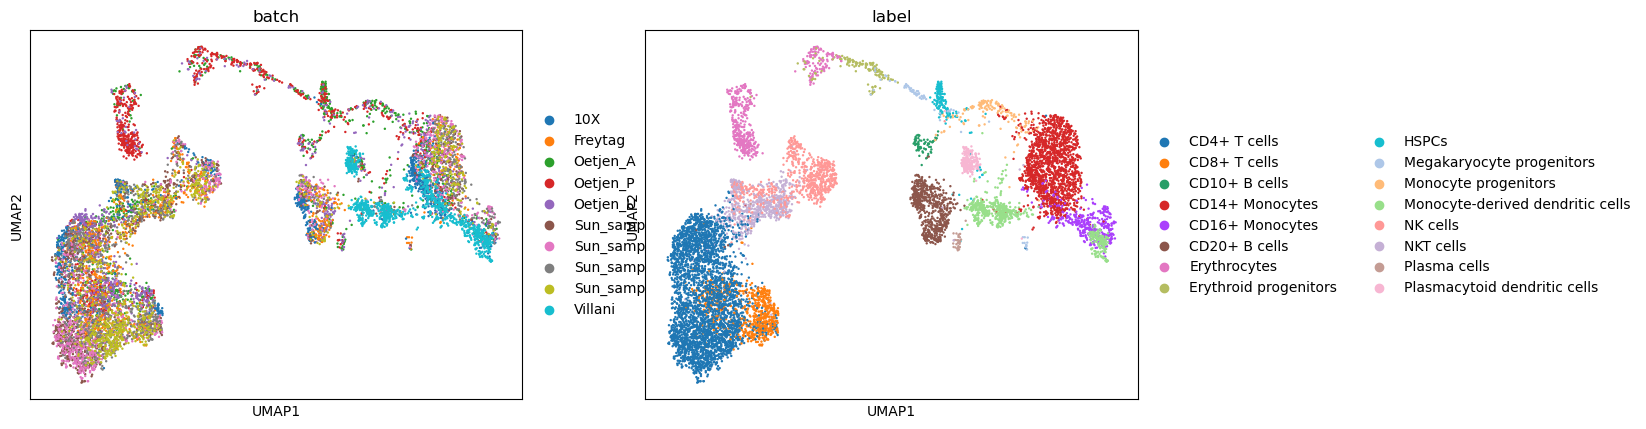

In [5]:
import scanpy as sc
def bbknn(dataset, dim = 2):
    dataset = scalp.pca.pca(dataset)
    [ds.obsm.pop('umap', None)for ds in dataset]
    dataset = scalp.mnn.bbknnwrap(dataset, dim = dim)
    stack = scalp.transform.stack(dataset)
    return stack

stack = bbknn(dataset)
sc.pl.umap(stack, color=['batch', 'label'])

# Combat 

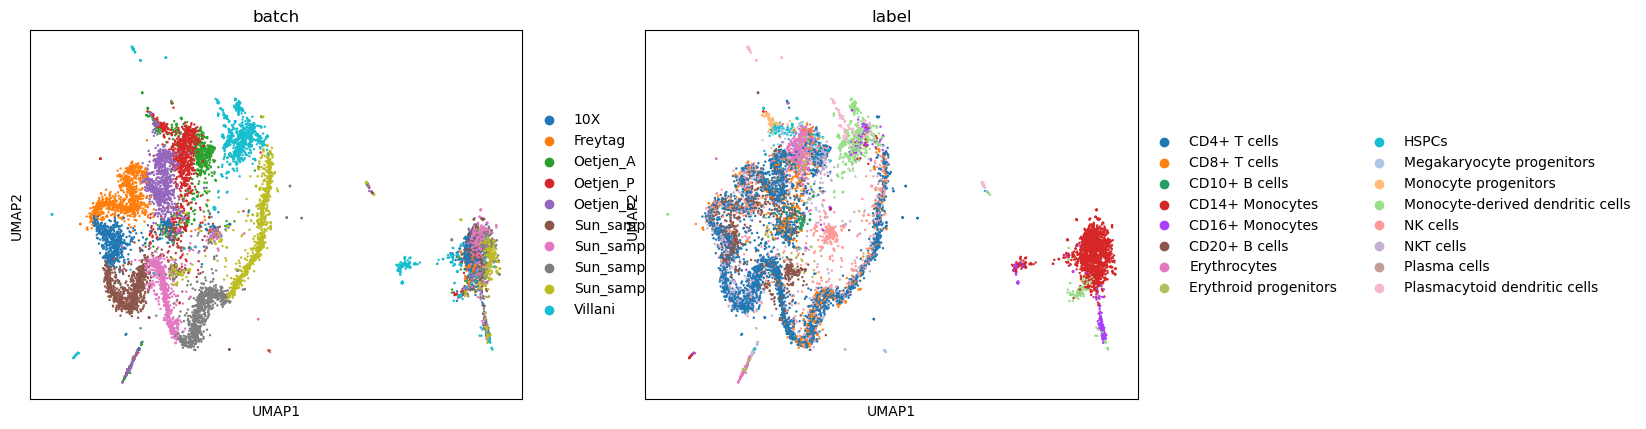

In [6]:
import scanpy as sc
def combat(dataset, dim = 2):
    [ds.obsm.pop('umap', None)for ds in dataset]
    dataset = scalp.mnn.combat(dataset)
    scalp.umapwrap.adatas_umap(dataset, label ='umap', from_obsm ='combat', dim =dim)
    return scalp.transform.stack(dataset)
stack= combat(dataset)
sc.pl.umap(stack, color=['batch', 'label'])

# SCALP

redundant pca :) 


/home/ubuntu/.myconda/miniconda3/envs/scalp/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/ubuntu/.myconda/miniconda3/envs/scalp/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


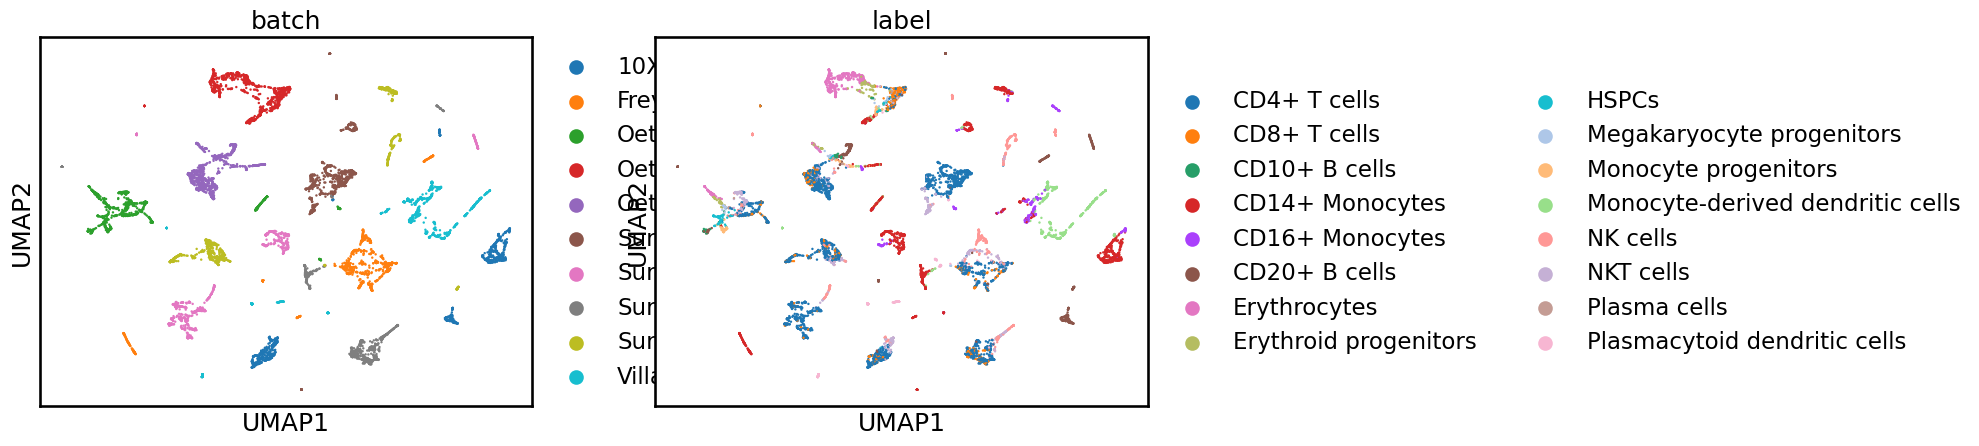

In [89]:
import scanpy as sc
from scipy.sparse import csr_matrix
def Scalp(dataset, dim = 2):
    parm = {'neighbors_total': 30, 'intra_neighbors_mutual': False,
            'neighbors_intra_fraction': .3, 'add_tree': True,
                  'copy_lsa_neighbors': False, 
            'inter_outlier_threshold': 0.95, 
            'inter_outlier_probabilistic_removal': False}
    dataset, grap = scalp.mkgraph(dataset,**parm)
    scalp.umapwrap.graph_pacmap(dataset,csr_matrix(grap).toarray(),label = 'umap', n_components = dim)
    # scalp.umapwrap.graph_umap(dataset,grap,label = 'umap', n_components = dim)
    return scalp.transform.stack(dataset)
    
stack = Scalp(dataset)
sc.pl.umap(stack, color=['batch', 'label'])

In [15]:
import ubergauss.tools as ut
from lmz import *

funcs = [scanorama, umaponly, bbknn, combat, Scalp] 

fuid = Range(funcs)
dataid = Range(datasets) 
tasks = [(f,d) for f in fuid for d in dataid]

def run(fd):
    f,d = fd
    fun = funcs[f]
    dat = datasets[d]
    stack = fun(dat,8)
    return stack
    
mydata = ut.xxmap(run, tasks) 

  0%|                                                                            | 0/20 [00:00<?, ?it/s]

redundant pca :) redundant pca :) redundant pca :) 


redundant pca :) 


/home/ubuntu/.myconda/miniconda3/envs/scalp/lib/python3.11/site-packages/scanpy/preprocessing/_combat.py:340: RuntimeWarning: divide by zero encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()
/home/ubuntu/.myconda/miniconda3/envs/scalp/lib/python3.11/site-packages/scanpy/preprocessing/_combat.py:340: RuntimeWarning: divide by zero encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()
/home/ubuntu/.myconda/miniconda3/envs/scalp/lib/python3.11/site-packages/scanpy/preprocessing/_combat.py:340: RuntimeWarning: divide by zero encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()
/home/ubuntu/.myconda/miniconda3/envs/scalp/lib/python3.11/site-packages/scanpy/preprocessing/_combat.py:340: RuntimeWarning: divide by zero encountered in divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


[[0.    0.732 0.01  0.265 0.235 0.105 0.009 0.073 0.006]
 [0.    0.    0.044 0.722 0.092 0.035 0.005 0.017 0.034]
 [0.    0.    0.    0.058 0.029 0.008 0.    0.002 0.084]
 [0.    0.    0.    0.    0.164 0.116 0.007 0.067 0.573]
 [0.    0.    0.    0.    0.    0.575 0.642 0.397 0.001]
 [0.    0.    0.    0.    0.    0.    0.261 0.689 0.005]
 [0.    0.    0.    0.    0.    0.    0.    0.381 0.014]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.066]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.   ]]
Processing datasets celseq <=> celseq2
Processing datasets celseq2 <=> smartseq2
[[0.    0.6   0.89  0.063 0.066 0.016 0.024 0.212 0.137 0.015]
 [0.    0.    0.694 0.092 0.093 0.054 0.017 0.052 0.018 0.004]
 [0.    0.    0.    0.357 0.162 0.087 0.078 0.39  0.191 0.002]
 [0.    0.    0.    0.    0.19  0.598 0.419 0.61  0.531 0.   ]
 [0.    0.    0.    0.    0.    0.35  0.141 0.068 0.059 0.179]
 [0.    0.    0.    0.    0.    0.    0.878 0.348 0.268 0.006]
 [0.    0.    0.    0.    0

/home/ubuntu/.myconda/miniconda3/envs/scalp/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Processing datasets Sun_sample2_KC <=> Sun_sample4_TC
Processing datasets Freytag <=> Sun_sample2_KC
Processing datasets Oetjen_U <=> Sun_sample3_TB
Processing datasets Oetjen_U <=> Freytag
Processing datasets 10X <=> Sun_sample1_CS
Processing datasets B1 <=> B3
Processing datasets Sun_sample1_CS <=> Sun_sample3_TB
Processing datasets Sun_sample1_CS <=> Sun_sample4_TC
Processing datasets Oetjen_A <=> Sun_sample3_TB
Processing datasets Freytag <=> Sun_sample4_TC
Processing datasets A6 <=> A2
Processing datasets Oetjen_U <=> Sun_sample4_TC
Processing datasets Freytag <=> 10X
Processing datasets 10X <=> Villani
Processing datasets Oetjen_U <=> 10X
Processing datasets 10X <=> Sun_sample2_KC
Processing datasets Oetjen_A <=> Sun_sample4_TC
Processing datasets Sun_sample1_CS <=> Sun_sample3_TB
Processing datasets A1 <=> A4
Processing datasets A6 <=> A5
Processing datasets 10X <=> Sun_sample1_CS
Processing datasets A6 <=> A3
Processing datasets B2 <=> B4
Processing datasets Freytag <=> Sun_sam

/home/ubuntu/.myconda/miniconda3/envs/scalp/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/ubuntu/.myconda/miniconda3/envs/scalp/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/ubuntu/.myconda/miniconda3/envs/scalp/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the chil

In [22]:
from scib.metrics import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import balanced_accuracy_score
def score(dataset):
    # ds2 = dataset.copy()
    # ds2.X = ds2.obsm['umap']
    # https://scib.readthedocs.io/en/latest/api.html#biological-conservation-metrics
    embed = 'umap' if 'umap' in dataset.obsm else 'X_umap'
    sc =  metrics(dataset, dataset, 'batch', 'label', embed = embed,
                       isolated_labels_asw_=True, silhouette_=True, hvg_score_=True, graph_conn_=True,
           pcr_=True,
             isolated_labels_f1_=True,
             trajectory_=False,
             nmi_=True,
            ari_=True )
    return dict(sc)[0]
    
def score_lin(dataset):
    y = dataset.obs['label']
    X = dataset.obsm['umap'] if 'umap' in dataset.obsm else dataset.obsm['X_umap']
    prediction = SGDClassifier().fit(X,y).predict(X)
    return accuracy_score(y , prediction )
    
def score_lin_batch(dataset):
    # do this per cell line
    def acc(label): 
        instances = dataset.obs['label'] == label 
        tmp_dataset = dataset[instances]
        y = tmp_dataset.obs['batch']
        if len(np.unique(y)) < 2:
            return np.nan
        X = tmp_dataset.obsm['umap'] if 'umap' in tmp_dataset.obsm else tmp_dataset.obsm['X_umap']
        prediction = SGDClassifier().fit(X,y).predict(X)
        return balanced_accuracy_score(y , prediction, adjusted=True )
    
    # scores = np.array([1-acc(l) for l in np.unique(dataset.obs['label'])]) ### !!!! 
    # weight by label counts .. 
    return np.nanmean([1-acc(l) for l in np.unique(dataset.obs['label'])])
    
scoredics_lb = ut.xxmap(score_lin_batch, mydata)
scoredics_scib = ut.xxmap(score, mydata)
scoredics_l = ut.xxmap(score_lin, mydata)

# score_lin_batch and score_lin -> pareto comparison

 10%|██████▊                                                             | 2/20 [00:02<00:19,  1.10s/it]Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
 30%|████████████████████▍                                               | 6/20 [00:04<00:08,  1.57it/s]Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
/home/ubuntu/.myconda/miniconda3/envs/scalp/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
 50%|█████████████████████████████████▌                                

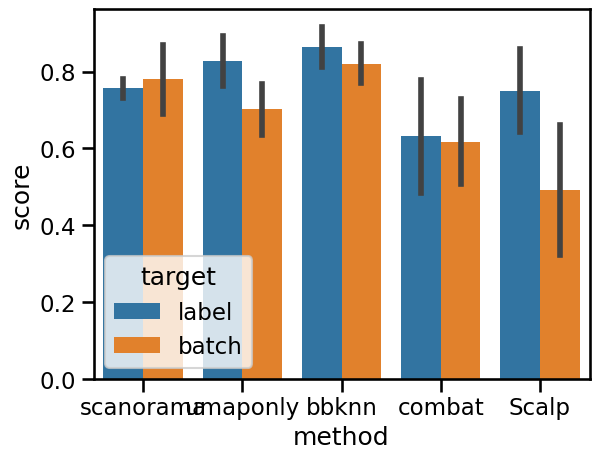

In [65]:
import pandas as pd
import seaborn as sns
# this only applies if we dont use the scib score fucntion
funcs = 'scanorama, umaponly, bbknn, combat, Scalp'.split(', ')

results = [ {"method":funcs[f], 'score':s, 'dataset':d, 'target':'label' } for s,(f,d) in zip(scoredics_l,tasks)]
results += [ {"method":funcs[f], 'score':s, 'dataset':d, 'target':'batch'} for s,(f,d) in zip(scoredics_lb,tasks)]
df = pd.DataFrame(results)
sns.barplot(data=df, y = 'score', x = 'method', errorbar = 'sd', hue='target')
plt.show()
ours = df.pivot_table(index='method', columns='target', values='score')

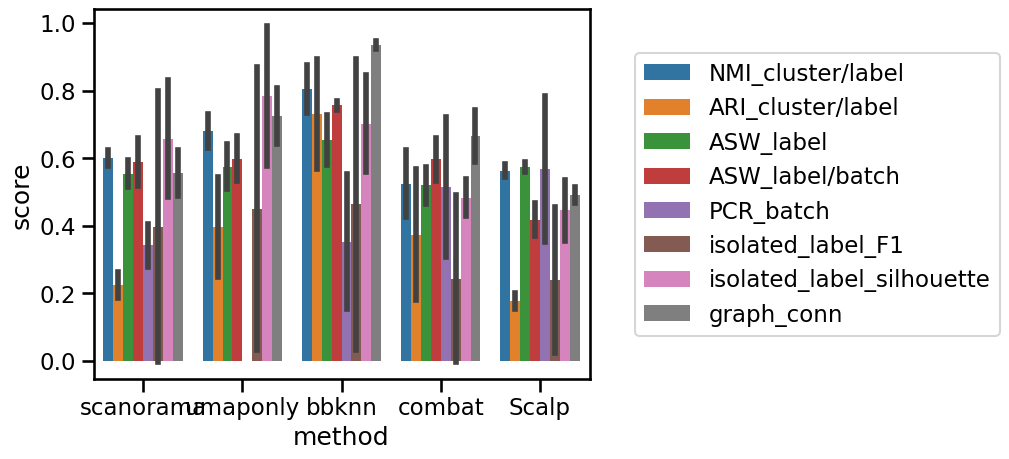

In [18]:
import lmz
# this is for SCIB scoring 
def doit(e):
    d = dict(e)
    for k in list(d.keys()):
        if np.isnan(d[k]):
            d.pop(k)
    d.pop('hvg_overlap',0)
    return d
scoredicts = lmz.Map(doit, scoredics_scib)

funcs = 'scanorama, umaponly, bbknn, combat, Scalp'.split(', ')
results = [ [{"method":funcs[f], 'score':ss, 'dataset':d, 'metric':scrmeth } 
             for (scrmeth,ss) in s.items() ]for s,(f,d) in zip(scoredicts,tasks)]
results = lmz.Flatten(results)

df = pd.DataFrame(results)
sns.barplot(data=df, y = 'score', x = 'method', errorbar = 'sd', hue = 'metric')
plt.legend(loc='right', bbox_to_anchor=(1.85, 0.5), ncol=1)
plt.show()

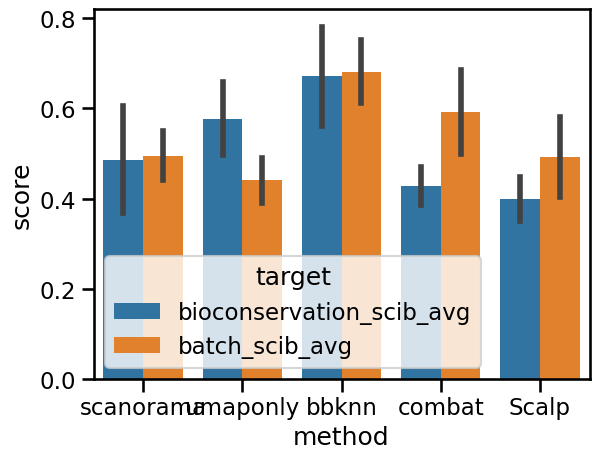

In [62]:

def split_scib_scores(dicts):
    batchwords = 'PCR_batch ASW_label/batch graph_conn'.split()
    
    def split(d):
        b = np.mean([v for k,v in d.items() if k in batchwords ])
        a = np.mean([v for k,v in d.items() if not k in batchwords ])
        return a,b
        
    scores = lmz.Map(split, dicts) 
    return lmz.Transpose(scores)    
  

scr_l, scr_b = split_scib_scores(scoredicts)
results = [ {"method":funcs[f], 'score':s, 'dataset':d, 'target':'bioconservation_scib_avg' } for s,(f,d) in zip(scr_l,tasks)]
results += [ {"method":funcs[f], 'score':s, 'dataset':d, 'target':'batch_scib_avg'} for s,(f,d) in zip(scr_b,tasks)]
df = pd.DataFrame(results)
sns.barplot(data=df, y = 'score', x = 'method', errorbar = 'sd', hue='target')
plt.show()
theirs = df.pivot_table(index='method', columns='target', values='score')

In [66]:
from ubergauss.optimization import pareto_scores
pareto_scores(df)

/home/ubuntu/repos/repolinks/lmz/__init__.py:53: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  return list(zip(*x))


[('Scalp', 9), ('bbknn', 0), ('combat', 11), ('scanorama', 4), ('umaponly', 5)]

array(['a', 'd', 's'], dtype='<U1')

In [37]:
results

[{'method': 'scanorama',
  'score': 0.5703445196259829,
  'dataset': 0,
  'target': 'bioconservation_scib_avg'},
 {'method': 'scanorama',
  'score': 0.6044273993438012,
  'dataset': 1,
  'target': 'bioconservation_scib_avg'},
 {'method': 'scanorama',
  'score': 0.3994843925647332,
  'dataset': 2,
  'target': 'bioconservation_scib_avg'},
 {'method': 'scanorama',
  'score': 0.37111584578744294,
  'dataset': 3,
  'target': 'bioconservation_scib_avg'},
 {'method': 'umaponly',
  'score': 0.6395509043500134,
  'dataset': 0,
  'target': 'bioconservation_scib_avg'},
 {'method': 'umaponly',
  'score': 0.6534134308279098,
  'dataset': 1,
  'target': 'bioconservation_scib_avg'},
 {'method': 'umaponly',
  'score': 0.5102779094092378,
  'dataset': 2,
  'target': 'bioconservation_scib_avg'},
 {'method': 'umaponly',
  'score': 0.5042693541335634,
  'dataset': 3,
  'target': 'bioconservation_scib_avg'},
 {'method': 'bbknn',
  'score': 0.6917206821435108,
  'dataset': 0,
  'target': 'bioconservation_sc

In [36]:
np.corrcoef(ours.batch.values, theirs.batch_scib_avg.values)[0,1], np.corrcoef(ours.label.values, theirs.bioconservation_scib_avg.values)[0,1]

(0.37704321264122875, 0.8247902728811594)